In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Retina display
%config InlineBackend.figure_format = 'retina'

In [23]:
from tueplots import bundles
plt.rcParams.update(bundles.beamer_moml())


# Also add despine to the bundle using rcParams
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Increase font size to match Beamer template
plt.rcParams['font.size'] = 16
# Make background transparent
plt.rcParams['figure.facecolor'] = 'none'

In [24]:
prior_mu = torch.zeros(2)
prior_cov = torch.eye(2)
theta = torch.distributions.MultivariateNormal(prior_mu, prior_cov)
theta

MultivariateNormal(loc: torch.Size([2]), covariance_matrix: torch.Size([2, 2]))

In [25]:
theta.loc, theta.covariance_matrix

(tensor([0., 0.]),
 tensor([[1., 0.],
         [0., 1.]]))

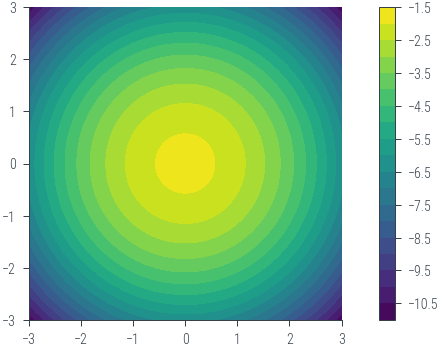

In [26]:
# Plot the prior in 2d contour

theta1 = torch.linspace(-3, 3, 100)
theta2 = torch.linspace(-3, 3, 100)

theta1, theta2 = torch.meshgrid(theta1, theta2)

theta_values = torch.stack((theta1, theta2), dim=-1)  # Shape: (100, 100, 2)

z = theta.log_prob(theta_values.view(-1, 2))  # Shape: (10000,)
z = z.view(100, 100)  # Reshape to (100, 100)

plt.contourf(theta1.numpy(), theta2.numpy(), z.numpy(), 20)
plt.gca().set_aspect('equal')

plt.colorbar()


In [27]:
theta_sample = theta.sample((1000,))
theta_sample

tensor([[-1.8783,  0.7921],
        [ 0.7293,  0.1063],
        [ 0.6363, -1.0957],
        ...,
        [-1.4223,  0.2716],
        [ 1.2850,  1.7269],
        [-0.0650,  0.0788]])

In [28]:
x_lin = torch.linspace(-5, 5, 100)
y_lin = theta_sample[:, 0].unsqueeze(1) + theta_sample[:, 1].unsqueeze(1) * x_lin.unsqueeze(0)

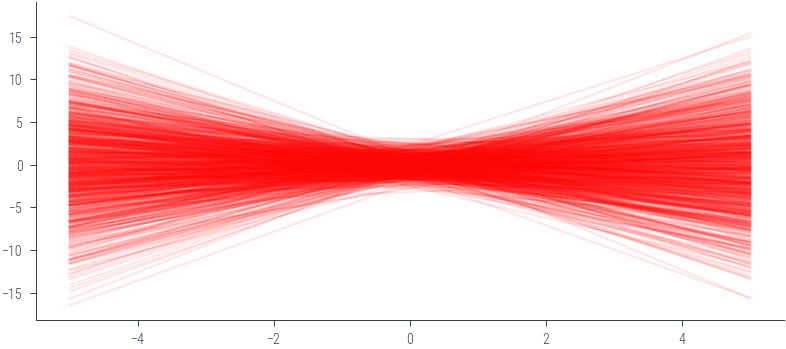

In [29]:
_ = plt.plot(x_lin.numpy(), y_lin.numpy().T, alpha=0.1, color='red')


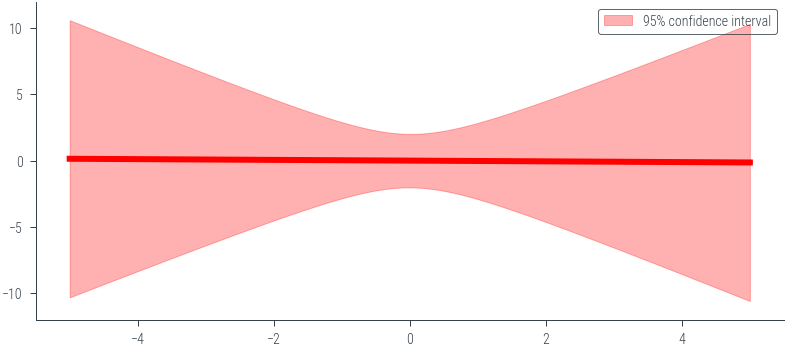

In [30]:
# Mean prediction
y_pred_mean = y_lin.mean(dim=0)
plt.plot(x_lin.numpy(), y_pred_mean.numpy(), color='red', linewidth=3)

# 95% confidence interval
y_pred_std = y_lin.std(dim=0)
plt.fill_between(x_lin.numpy(), (y_pred_mean - 2 * y_pred_std).numpy(), (y_pred_mean + 2 * y_pred_std).numpy(), alpha=0.3, color='red', label='95% confidence interval')
plt.ylim(-12, 12)
plt.legend()


/tmp/ipykernel_57304/1762244273.py:11: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


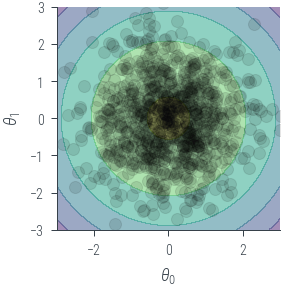

In [31]:
# Plot the theta samples on the contour plot as scatter points

plt.contourf(theta1.numpy(), theta2.numpy(), z.numpy(), 4, alpha=0.5)
plt.gca().set_aspect('equal')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')

plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.scatter(theta_sample[:, 0].numpy(), theta_sample[:, 1].numpy(), alpha=0.1, color='black')
plt.tight_layout()

# Closed form solution for prior predictive distribution

![CleanShot 2023-06-05 at 17.47.27@2x.png](<attachment:CleanShot 2023-06-05 at 17.47.27@2x.png>)
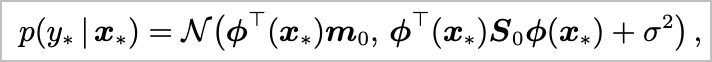

In [32]:
### Noiseless case

(-12.0, 12.0)

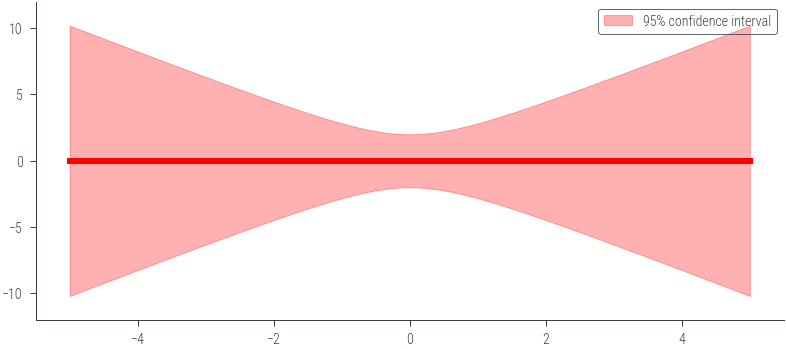

In [33]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Define the prior parameters
m0 = torch.tensor([0.0, 0.0])  # Mean of the prior
S0 = torch.tensor([[1.0, 0.0], [0.0, 1.0]])  # Covariance matrix of the prior
sigma = 0.0  # Noise parameter

# Define the basis function (phi)
def phi(x):
    return torch.tensor([1.0, x])

# Function to calculate the prior predictive distribution
def prior_predictive(x_star, m0, S0, sigma):
    phi_x_star = torch.stack([phi(x) for x in x_star])
    predictive_mean = phi_x_star @ m0
    predictive_cov = torch.diagonal(phi_x_star @ S0 @ phi_x_star.t(), offset=0) + sigma**2
    return predictive_mean, predictive_cov

# Generate x values for prediction
x_star = torch.linspace(-5, 5, 100)

# Calculate the prior predictive distribution
predictive_mean, predictive_cov = prior_predictive(x_star, m0, S0, sigma)

# Plot mean +- 2 std
plt.plot(x_star.numpy(), predictive_mean.numpy(), color='red', linewidth=3)
plt.fill_between(x_star.numpy(), (predictive_mean - 2 * torch.sqrt(predictive_cov)).numpy(), (predictive_mean + 2 * torch.sqrt(predictive_cov)).numpy(), alpha=0.3, color='red', label='95% confidence interval')
plt.legend()
plt.ylim(-12, 12)


In [34]:
y_pred_std

tensor([5.2264, 5.1248, 5.0232, 4.9218, 4.8205, 4.7192, 4.6181, 4.5170, 4.4161,
        4.3153, 4.2147, 4.1142, 4.0138, 3.9136, 3.8136, 3.7138, 3.6142, 3.5149,
        3.4157, 3.3169, 3.2184, 3.1202, 3.0223, 2.9249, 2.8278, 2.7313, 2.6353,
        2.5399, 2.4452, 2.3512, 2.2580, 2.1658, 2.0747, 1.9848, 1.8963, 1.8094,
        1.7243, 1.6414, 1.5609, 1.4833, 1.4091, 1.3388, 1.2730, 1.2125, 1.1581,
        1.1108, 1.0714, 1.0409, 1.0200, 1.0094, 1.0093, 1.0198, 1.0406, 1.0710,
        1.1103, 1.1576, 1.2119, 1.2723, 1.3381, 1.4084, 1.4826, 1.5601, 1.6405,
        1.7234, 1.8085, 1.8954, 1.9839, 2.0737, 2.1649, 2.2571, 2.3502, 2.4442,
        2.5389, 2.6343, 2.7303, 2.8268, 2.9238, 3.0213, 3.1191, 3.2173, 3.3159,
        3.4147, 3.5138, 3.6132, 3.7128, 3.8126, 3.9126, 4.0128, 4.1131, 4.2136,
        4.3143, 4.4151, 4.5160, 4.6170, 4.7182, 4.8194, 4.9207, 5.0222, 5.1237,
        5.2253])

In [35]:
torch.sqrt(predictive_cov)

tensor([5.0990, 5.0000, 4.9011, 4.8022, 4.7035, 4.6048, 4.5063, 4.4079, 4.3095,
        4.2114, 4.1133, 4.0154, 3.9177, 3.8201, 3.7227, 3.6255, 3.5285, 3.4318,
        3.3353, 3.2390, 3.1431, 3.0475, 2.9523, 2.8575, 2.7631, 2.6692, 2.5758,
        2.4830, 2.3909, 2.2995, 2.2090, 2.1194, 2.0309, 1.9437, 1.8578, 1.7735,
        1.6910, 1.6107, 1.5328, 1.4577, 1.3859, 1.3180, 1.2546, 1.1963, 1.1440,
        1.0985, 1.0607, 1.0314, 1.0114, 1.0013, 1.0013, 1.0114, 1.0314, 1.0607,
        1.0985, 1.1440, 1.1963, 1.2546, 1.3180, 1.3859, 1.4577, 1.5328, 1.6107,
        1.6910, 1.7735, 1.8578, 1.9437, 2.0309, 2.1194, 2.2090, 2.2995, 2.3909,
        2.4830, 2.5758, 2.6692, 2.7631, 2.8575, 2.9523, 3.0475, 3.1431, 3.2390,
        3.3353, 3.4318, 3.5285, 3.6255, 3.7227, 3.8201, 3.9177, 4.0154, 4.1133,
        4.2114, 4.3095, 4.4079, 4.5063, 4.6048, 4.7035, 4.8022, 4.9011, 5.0000,
        5.0990])

### Computing the evidence term


$$ I = \int p(\mathcal{D} \mid \theta) p(\theta) \mathrm{d}\theta $$

$$ I \approx \frac{1}{N} \sum_{i=1}^N p(\mathcal{D} \mid \theta_i) $$

where $\theta_i \sim p(\theta)$


In [36]:
theta

MultivariateNormal(loc: torch.Size([2]), covariance_matrix: torch.Size([2, 2]))

In [37]:
theta.sample((10,))

tensor([[-0.7712,  1.9991],
        [-0.6919, -0.3068],
        [ 1.2983,  1.2461],
        [-2.2901,  0.7368],
        [-0.8971, -0.3141],
        [ 0.0589,  0.6512],
        [ 0.0549,  1.1111],
        [-0.7357,  0.3042],
        [-1.0303,  1.4628],
        [-0.8665,  0.4207]])

In [38]:
def forward(x, theta):
    return theta[:, 0].unsqueeze(1) + theta[:, 1].unsqueeze(1) * x.unsqueeze(0)

def likelihood(y, x, theta, sigma):
    return torch.distributions.Normal(forward(x, theta), sigma).log_prob(y).sum(dim=1)




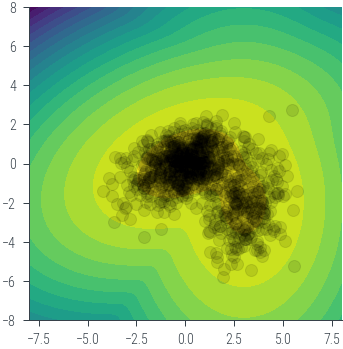

In [15]:
# Use a different prior distribution: a mixture of two Gaussians

pis = torch.tensor([0.7, 0.3])
norm1 = torch.distributions.MultivariateNormal(torch.tensor([0.0, 0.0]), torch.tensor([[2.0, 0.5], [0.5, 1.0]]))
norm2 = torch.distributions.MultivariateNormal(torch.tensor([3.0, -2.0]), torch.tensor([[1.0, 0.0], [0.0, 2.0]]))

mog = torch.distributions.MixtureSameFamily(torch.distributions.Categorical(pis), 
                                            torch.distributions.MultivariateNormal(torch.stack((norm1.loc, norm2.loc)),
                                             torch.stack((norm1.covariance_matrix, norm2.covariance_matrix))))

theta = mog.sample((1000,))

# Plot the samples


# Plot the prior in 2d contour

theta1 = torch.linspace(-8, 8, 100)
theta2 = torch.linspace(-8, 8, 100)

theta1, theta2 = torch.meshgrid(theta1, theta2)

theta_values = torch.stack((theta1, theta2), dim=-1)  # Shape: (100, 100, 2)

z = mog.log_prob(theta_values.view(-1, 2))  # Shape: (10000,)
z = z.view(100, 100)  # Reshape to (100, 100)

plt.contourf(theta1.numpy(), theta2.numpy(), z.numpy(), 20)
plt.gca().set_aspect('equal')

plt.scatter(theta[:, 0].numpy(), theta[:, 1].numpy(), alpha=0.1, color='black')



In [16]:
theta_sample = mog.sample((1000,))
y_lin = theta_sample[:, 0].unsqueeze(1) + theta_sample[:, 1].unsqueeze(1) * x_lin.unsqueeze(0)

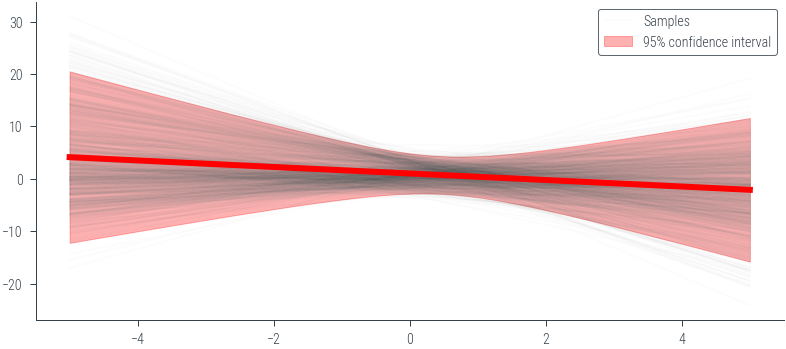

In [17]:
_ = plt.plot(x_lin.numpy(), y_lin.numpy().T, alpha=0.01, color='black')

# Plot the last sample to see the line and mark the label
_ = plt.plot(x_lin.numpy(), y_lin.numpy()[-1], alpha=0.01, color='black', label='Samples')

# Mean prediction
y_pred_mean = y_lin.mean(dim=0)
plt.plot(x_lin.numpy(), y_pred_mean.numpy(), color='red', linewidth=3)

# 95% confidence interval
y_pred_std = y_lin.std(dim=0)
plt.fill_between(x_lin.numpy(), (y_pred_mean - 2 * y_pred_std).numpy(), (y_pred_mean + 2 * y_pred_std).numpy(), alpha=0.3, color='red', label='95% confidence interval')

plt.legend()